In [1]:
%matplotlib widget

import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
from pymatreader import read_mat
from scipy import sparse
import numpy as np
import os
from datetime import datetime, timedelta
import pandas
from amftrack.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
import cv2
import json
import pandas as pd
from amftrack.pipeline.paths.directory import *
from amftrack.util import *
from amftrack.pipeline.functions.extract_observable import *
import pickle
from joblib import Parallel, delayed
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
directory = directory_project
update_analysis_info(directory)
analysis_info = get_current_analysis(directory)

In [3]:
# select = analysis_info.loc[analysis_info['PrincePos']==39]
select_v4 = analysis_info.loc[(analysis_info['version']=='Version4')]
select_v3 = analysis_info.loc[(analysis_info['version']=='Version3')]
select_v5 = analysis_info.loc[(analysis_info['version']=='Version5')]
select_v6 = analysis_info.loc[(analysis_info['version']=='Version6')]
select_v7 = analysis_info.loc[(analysis_info['version']=='Version7')]


len(select_v7),select_v7.columns

(28,
 Index(['folder_analysis', 'version', 'Plate', 'PrincePos', 'root', 'strain',
        'medium', 'split', 'Temp', 'CrossDate', 'date', 'Pbait', 'date_begin',
        'date_end', 'number_timepoints', 'path_exp', 'path_analysis_info',
        'date_run_analysis'],
       dtype='object'))

In [7]:
plates = set(select_v7['Plate'].values)
plates
selection = []
for plate in plates:
    select_folder = np.min(select_v7.loc[(select_v7['Plate']==plate)]['folder_analysis'])
    selection.append(select_folder)
select = select_v7.loc[(select_v7['folder_analysis'].isin(selection))]

In [5]:
select = select_v7.loc[(select_v7['Plate']==790)]

In [103]:
select_v4

,folder_analysis,version,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,date,Pbait,date_begin,date_end,number_timepoints,path_exp,path_analysis_info,date_run_analysis
5,Analysis_1635785189766511078_Version4,Version4,76,38,Carrot,A5,001P100N,Y,None,20210108,"10.01.2021, 11:44:",-,20210108_1143_Plate38,20210112_2337_Plate38,25,Analysis_1635785189766511078_Version4/experime...,Analysis_1635785189766511078_Version4/static_i...,"01.11.2021, 17:46:"
6,Analysis_1635791680524579338_Version4,Version4,22,29,Carrot,A5,001P100N,Y,None,20210107,"12.01.2021, 11:20:",-,20210107_1119_Plate29,20210112_2320_Plate29,31,Analysis_1635791680524579338_Version4/experime...,Analysis_1635791680524579338_Version4/static_i...,"01.11.2021, 19:34:"
15,Analysis_1635791831592047697_Version4,Version4,80,36,Carrot,A5,001P100N,Y,None,20201127,"03.12.2020, 09:55:",-,20201128_1802_Plate36,20201206_2113_Plate36,47,Analysis_1635791831592047697_Version4/experime...,Analysis_1635791831592047697_Version4/static_i...,"01.11.2021, 19:37:"
19,Analysis_1635773798588222074_Version4,Version4,799,39,Carrot,A5,001P100N,Y,None,20211001,"05.10.2021, 01:48:",-,20211001_1620_Plate39,20211011_1227_Plate39,95,Analysis_1635773798588222074_Version4/experime...,Analysis_1635773798588222074_Version4/static_i...,"01.11.2021, 14:36:"
22,Analysis_1635792075923476212_Version4,Version4,76,38,Carrot,A5,001P100N,Y,None,20210108,"10.01.2021, 11:44:",-,20210108_1143_Plate38,20210112_2337_Plate38,25,Analysis_1635792075923476212_Version4/experime...,Analysis_1635792075923476212_Version4/static_i...,"01.11.2021, 19:41:"
23,Analysis_1635791854647159646_Version4,Version4,88,17,Carrot,A5,001P100N,Y,None,20210915,"22.09.2021, 23:13:",-,20210915_1507_Plate17,20210923_2112_Plate17,100,Analysis_1635791854647159646_Version4/experime...,Analysis_1635791854647159646_Version4/static_i...,"01.11.2021, 19:37:"
25,Analysis_1635791843912287454_Version4,Version4,792,21,Carrot,A5,001P100N,Y,None,20210915,"18.09.2021, 17:29:",-,20210915_1518_Plate21,20210927_2108_Plate21,100,Analysis_1635791843912287454_Version4/experime...,Analysis_1635791843912287454_Version4/static_i...,"01.11.2021, 19:37:"
33,Analysis_1635792003707659972_Version4,Version4,799,39,Carrot,A5,001P100N,Y,None,20211001,"05.10.2021, 01:48:",-,20211001_1620_Plate39,20211011_1227_Plate39,95,Analysis_1635792003707659972_Version4/experime...,Analysis_1635792003707659972_Version4/static_i...,"01.11.2021, 19:40:"
34,Analysis_1635792966629774607_Version4,Version4,94,39,Carrot,A5,001P100N,Y,25,20201123,"27.11.2020, 16:13:",None,20201123_1253_Plate39,20201127_1613_Plate39,100,Analysis_1635792966629774607_Version4/experime...,Analysis_1635792966629774607_Version4/static_i...,"01.11.2021, 19:56:"
35,Analysis_1635772662499455816_Version4,Version4,88,17,Carrot,A5,001P100N,Y,None,20210915,"22.09.2021, 23:13:",-,20210915_1507_Plate17,20210923_2112_Plate17,100,Analysis_1635772662499455816_Version4/experime...,Analysis_1635772662499455816_Version4/static_i...,"01.11.2021, 14:17:"


In [14]:
from shutil import copyfile
for index,row in select_v7.iterrows():
    plate = row['Plate']
    folder_target = row['folder_analysis']
    if len(select_v3.loc[select_v3['Plate']==plate]['folder_analysis'])>0:
        folder_origin = select_v3.loc[select_v3['Plate']==plate]['folder_analysis'].values[0]
        src = f'{directory_project}{folder_origin}/reach_out.npy'
        dst = f'{directory_project}{folder_target}/reach_out.npy'
        if os.path.isfile(src):
            print(dst)
            copyfile(src, dst)
        else:
            print(plate)

22
/projects/0/einf914/data/Analysis_1635803775966705431_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635816105381797751_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635811225686163538_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635803952870635797_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635810982606931205_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635803530840438309_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635803764989403054_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635811486186308776_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635804634831318343_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635813735749654989_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635806977480423097_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635803411390782484_Version7/reach_out.npy
/projects/0/einf914/data/Analysis_1635812920180154543_Version7/reach_out.

In [6]:
time = '10:00'
directory = directory_project
list_f = [get_length,get_area, get_num_tips,get_num_nodes,get_area_study_zone,get_num_tips_study_zone,get_num_nodes_study_zone,get_length_study_zone,is_out_study]
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 10
run_parallel_post('exp_plot.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'post_process',cpus = 32)

Submitted batch job 58308
Submitted batch job 58309


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [15]:
time = '15:00'
directory = directory_project
list_f = [get_length,get_area, get_num_tips,get_num_nodes,get_area_study_zone,get_num_tips_study_zone,get_num_nodes_study_zone,get_length_study_zone,is_out_study]
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 5
run_parallel_post('time_plate_post_process.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'post_process',cpus = 128)

Submitted batch job 57596
Submitted batch job 57597
Submitted batch job 57598
Submitted batch job 57599


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [115]:
whole_plate_info.head()

,t,tot_length,area,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,date,Plate,path_exp,path_analysis_info,path_dynamic_infos
0,0,402748,1288.67,188,1153,1288.67,188,1153,402748,0,"29.12.2020, 03:49:",102,Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/static_i...,Analysis_1635771280142655334_Version3/dynamic_...
1,1,1.41165e+06,1962.78,790,4438,1929.3,785,4420,1.40357e+06,0,"30.12.2020, 23:33:",102,Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/static_i...,Analysis_1635771280142655334_Version3/dynamic_...
2,2,2.80661e+06,2366.79,1668,9496,2269.15,1632,9352,2.74845e+06,0,"03.01.2021, 23:32:",102,Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/static_i...,Analysis_1635771280142655334_Version3/dynamic_...
3,3,747624,1617.98,355,2240,1617.98,355,2240,747624,0,"29.12.2020, 23:36:",102,Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/static_i...,Analysis_1635771280142655334_Version3/dynamic_...
4,4,85041.5,899.974,31,297,893.007,30,296,84440.4,0,"27.12.2020, 08:03:",102,Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/static_i...,Analysis_1635771280142655334_Version3/dynamic_...


In [38]:
whole_plate_info.loc[whole_plate_info['out_study']==1]

,t,tot_length,area,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,date,path_exp,path_dynamic_infos,datetime,time_since_begin,density
26,26,112750,1068.03,33,278,1068.03,33,278,112750,1,"27.12.2020, 16:03:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-27 16:03:00,27.650000,105.567
27,27,2.97778e+06,2411.77,1802,10492,2266.72,1741,10238,2.87734e+06,1,"05.01.2021, 11:45:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2021-01-05 11:45:00,239.350000,1269.39
28,28,149712,1040.3,54,382,1040.3,54,382,149712,1,"27.12.2020, 23:50:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-27 23:50:00,35.433333,143.912
29,29,86107.2,1003.4,39,265,994.363,38,263,85498.9,1,"27.12.2020, 04:03:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-27 04:03:00,15.650000,85.9836
30,30,585202,1460.62,279,1775,1460.62,279,1775,585202,1,"29.12.2020, 15:36:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-29 15:36:00,75.200000,400.654
31,31,1.56081e+06,2096.02,861,4938,1984.15,849,4861,1.53764e+06,1,"31.12.2020, 03:33:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-31 03:33:00,111.150000,774.959
32,32,308801,1195.88,133,841,1195.88,133,841,308801,1,"28.12.2020, 19:50:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-28 19:50:00,55.433333,258.221
33,33,1.28056e+06,1977.77,710,4027,1858.88,707,4007,1.2731e+06,1,"30.12.2020, 19:33:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-30 19:33:00,103.150000,684.873
34,34,663302,1535.6,309,2002,1535.6,309,2002,663302,1,"29.12.2020, 19:36:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-29 19:36:00,79.200000,431.951
35,35,1.89313e+06,2341.74,1030,5602,2241.42,1001,5475,1.84779e+06,1,"31.12.2020, 23:33:",Analysis_1635771280142655334_Version3/experime...,Analysis_1635771280142655334_Version3/dynamic_...,2020-12-31 23:33:00,131.150000,824.385


Analysis_1635803385128979235_Version7
Analysis_1635803714847232986_Version7


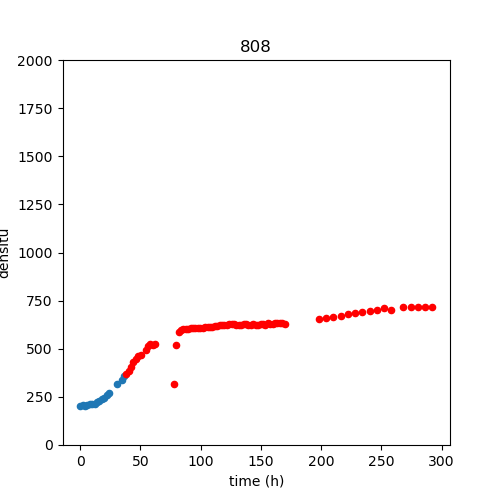

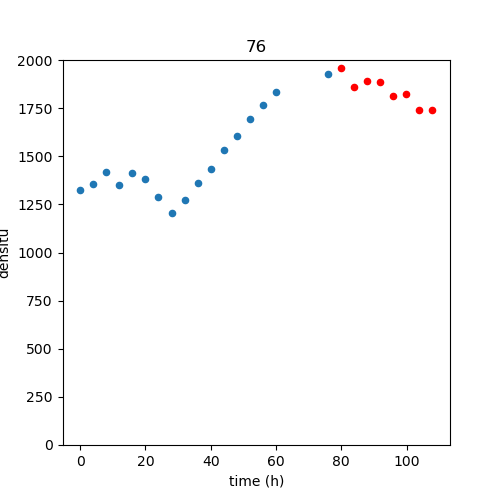

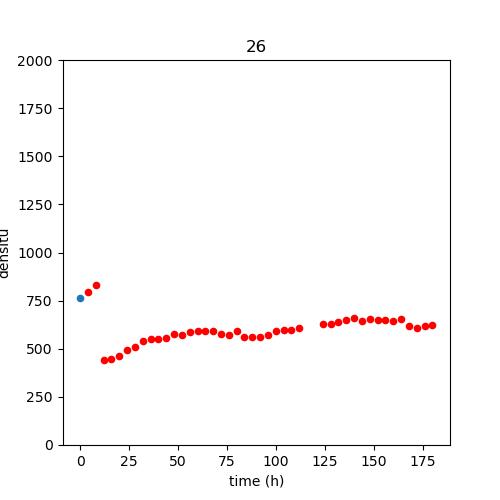

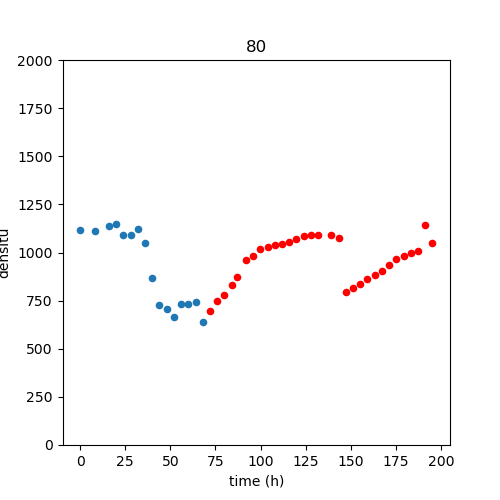

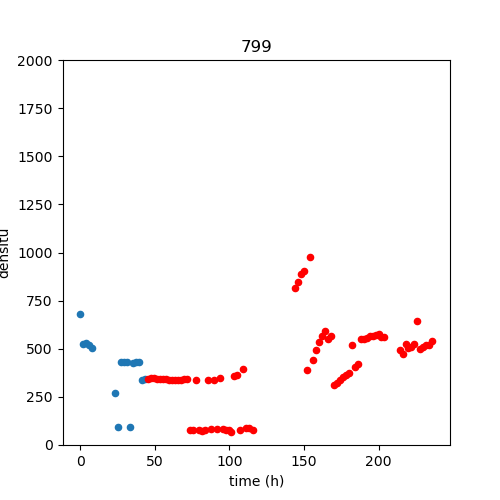

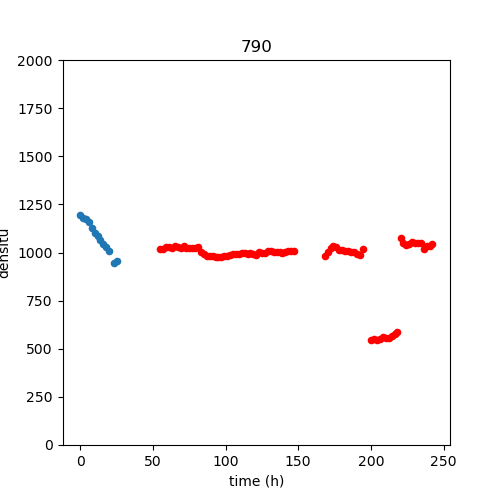

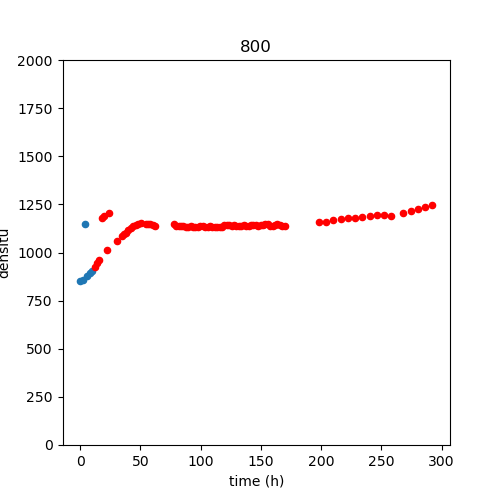

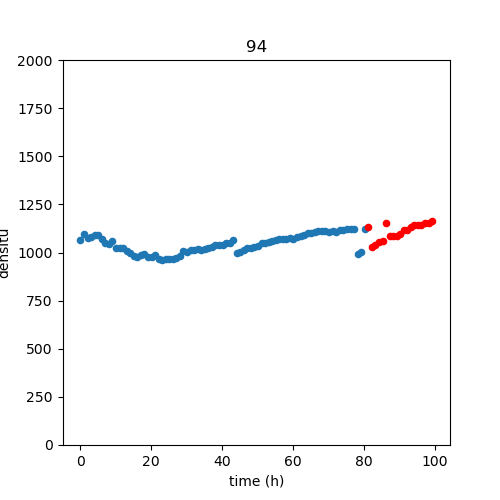

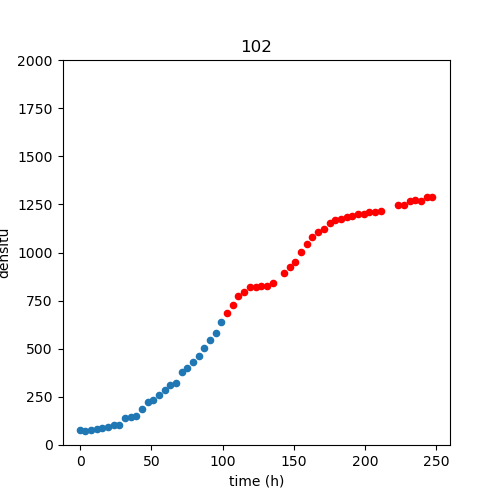

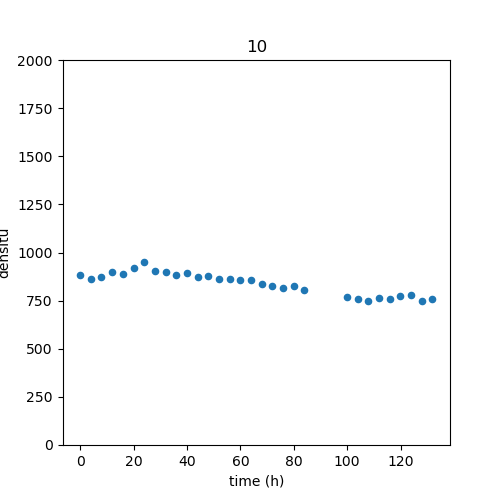

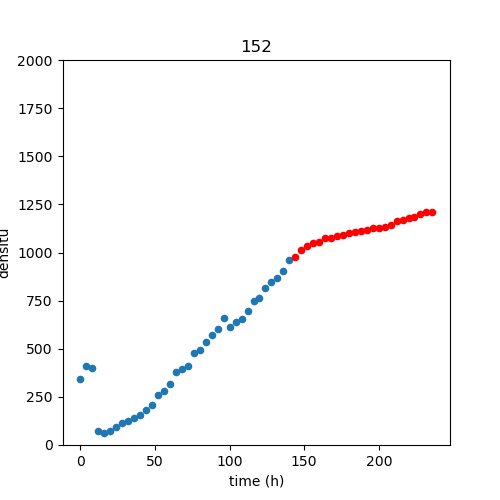

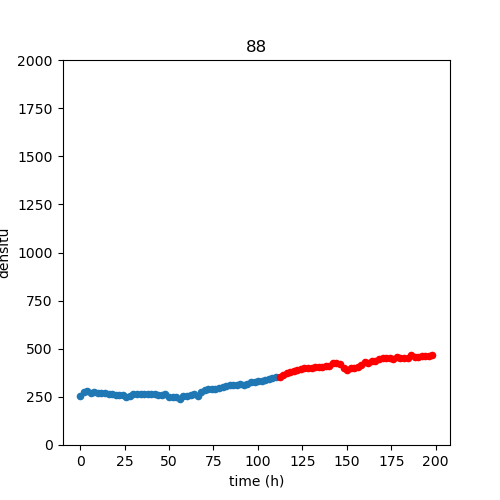

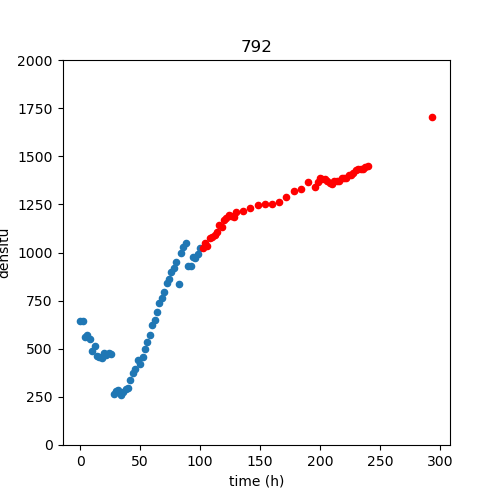

In [27]:
plt.close('all')
x = 'time_since_begin'
y = 'density'
xlabel = 'time (h)'
ylabel = 'densitu'
logy = False
logx = False
ylim = 0,2000
for index, row in select.iterrows():
    folder = row['folder_analysis']
    path_analysis_info = row['path_analysis_info']
    plate = row['Plate']
    if os.path.isfile(f'{directory}{path_analysis_info}'):
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        whole_plate_info = pd.read_json(f'{directory}{path_analysis_info}',
       convert_dates=True).transpose()
        whole_plate_info.index.name = 't'
        whole_plate_info.reset_index(inplace=True)
        whole_plate_info['datetime'] = pd.to_datetime(whole_plate_info['date'], format="%d.%m.%Y, %H:%M:")
        whole_plate_info['time_since_begin'] = (whole_plate_info['datetime'] - min(whole_plate_info['datetime']))/ np.timedelta64(1, 'h')
        whole_plate_info['density'] = whole_plate_info['tot_length_study']/whole_plate_info['area_study']
        in_study = whole_plate_info.loc[whole_plate_info['out_study']==0]
        out_study = whole_plate_info.loc[whole_plate_info['out_study']==1]
        in_study.plot(x,y,'scatter',title = plate,ax=ax,logy = logy,logx = logx,xlabel=xlabel,ylabel=ylabel,ylim = ylim)
        out_study.plot(x,y,'scatter',title = plate,ax=ax,color='red',logx = logx,logy = logy,xlabel=xlabel,ylabel=ylabel,ylim = ylim)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    else:
        print(folder)

In [ ]:
whole_plate_info.head()

In [ ]:
whole_plate_info['date']

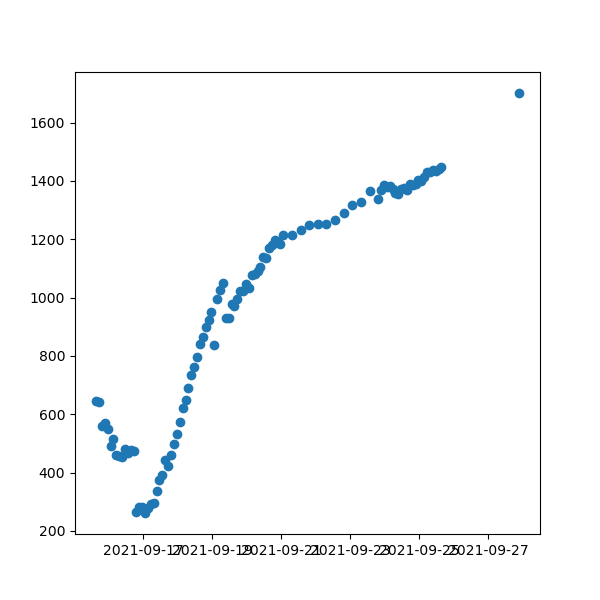

In [12]:
import matplotlib.pyplot as plt
x = whole_plate_info['datetime']
y = whole_plate_info['tot_length_study']/whole_plate_info['area_study']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(x,y)

In [53]:
row

folder_analysis                   Analysis_1635771280142655334_Version3
version                                                        Version3
Plate                                                               102
PrincePos                                                            40
root                                                             Carrot
strain                                                               A5
medium                                                         001P100N
split                                                                 Y
Temp                                                                 25
CrossDate                                                      20201226
date                                                 29.12.2020, 03:49:
Pbait                                                              None
date_begin                                        20201226_1224_Plate40
date_end                                          20210105_1945_

In [21]:
list_f = [get_time,get_speed,get_time_since_start]
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 10
time = '10:00'
for index, row in select.iterrows():
    folder = row['folder_analysis']
    path_analysis_info = row['path_analysis_info']
    plate = row['Plate']
    if os.path.isfile(f'{directory}{path_analysis_info}'):
        whole_plate_info = pd.read_json(f'{directory}{path_analysis_info}',
       convert_dates=True).transpose()
        whole_plate_info.index.name = 't'
        whole_plate_info.reset_index(inplace=True)
        run_parallel_post('time_hypha_post_process.py', list_f,list_args,[directory,overwrite],whole_plate_info, num_parallel, time,'hypha_post_process',cpus = 128)

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57670
Submitted batch job 57671
Submitted batch job 57672
Submitted batch job 57673
Submitted batch job 57674
Submitted batch job 57675
Submitted batch job 57676
Submitted batch job 57677
Submitted batch job 57678
Submitted batch job 57679


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a n

Submitted batch job 57680
Submitted batch job 57681
Submitted batch job 57682
Submitted batch job 57683


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57684
Submitted batch job 57685
Submitted batch job 57686
Submitted batch job 57687
Submitted batch job 57688


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57689
Submitted batch job 57690
Submitted batch job 57691
Submitted batch job 57692


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57693
Submitted batch job 57694
Submitted batch job 57696
Submitted batch job 57697


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57698
Submitted batch job 57699
Submitted batch job 57700
Submitted batch job 57701


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57702
Submitted batch job 57703
Submitted batch job 57704


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57705
Submitted batch job 57706
Submitted batch job 57707
Submitted batch job 57708
Submitted batch job 57709


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57710
Submitted batch job 57711
Submitted batch job 57712
Submitted batch job 57713


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57714
Submitted batch job 57715
Submitted batch job 57716
Submitted batch job 57717
Submitted batch job 57718
Submitted batch job 57719
Submitted batch job 57720
Submitted batch job 57721
Submitted batch job 57722
Submitted batch job 57723


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a n

Submitted batch job 57724
Submitted batch job 57725
Submitted batch job 57726
Submitted batch job 57727
Submitted batch job 57728


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57729
Submitted batch job 57730
Submitted batch job 57731
Submitted batch job 57732
Submitted batch job 57733


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57734
Submitted batch job 57735
Submitted batch job 57736
Submitted batch job 57737
Submitted batch job 57738
Submitted batch job 57739
Submitted batch job 57740
Submitted batch job 57741


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57742
Submitted batch job 57743
Submitted batch job 57744
Submitted batch job 57745


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57746
Submitted batch job 57747
Submitted batch job 57748
Submitted batch job 57749
Submitted batch job 57750


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57751
Submitted batch job 57752
Submitted batch job 57753
Submitted batch job 57755


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57756
Submitted batch job 57757
Submitted batch job 57758
Submitted batch job 57759


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57760
Submitted batch job 57761
Submitted batch job 57762
Submitted batch job 57763
Submitted batch job 57764


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57765
Submitted batch job 57766
Submitted batch job 57767
Submitted batch job 57768


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 57769
Submitted batch job 57770
Submitted batch job 57771
Submitted batch job 57772
Submitted batch job 57773
Submitted batch job 57774
Submitted batch job 57775


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [36]:
whole_plate_info.head()

,t,tot_length,area,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,date,Plate,path_exp,path_analysis_info,path_dynamic_infos,datetime,time_since_begin,density
0,0,8341.01,5.29015,5,17,2.29478,3,12,2561.53,0,"28.11.2020, 18:02:",80,Analysis_1635773158120263800_Version4/experime...,Analysis_1635773158120263800_Version4/static_i...,Analysis_1635773158120263800_Version4/dynamic_...,2020-11-28 18:02:00,0.0,1116.24
1,1,8653.6,5.60955,5,16,2.58437,3,12,2874.16,0,"29.11.2020, 02:02:",80,Analysis_1635773158120263800_Version4/experime...,Analysis_1635773158120263800_Version4/static_i...,Analysis_1635773158120263800_Version4/dynamic_...,2020-11-29 02:02:00,8.0,1112.13
2,2,10821.2,7.84312,6,14,4.43509,4,9,5054.35,0,"29.11.2020, 10:02:",80,Analysis_1635773158120263800_Version4/experime...,Analysis_1635773158120263800_Version4/static_i...,Analysis_1635773158120263800_Version4/dynamic_...,2020-11-29 10:02:00,16.0,1139.63
3,3,12226.4,9.18346,7,16,5.64769,5,12,6476.8,0,"29.11.2020, 14:02:",80,Analysis_1635773158120263800_Version4/experime...,Analysis_1635773158120263800_Version4/static_i...,Analysis_1635773158120263800_Version4/dynamic_...,2020-11-29 14:02:00,20.0,1146.81
4,4,13055.1,10.2418,7,18,6.70898,5,14,7313.44,0,"29.11.2020, 18:02:",80,Analysis_1635773158120263800_Version4/experime...,Analysis_1635773158120263800_Version4/static_i...,Analysis_1635773158120263800_Version4/dynamic_...,2020-11-29 18:02:00,24.0,1090.1


In [8]:
frames = []
for index, row in select.iterrows():
    folder = row['folder_analysis']
    path_analysis_info = row['path_analysis_info']
    plate = row['Plate']
    if os.path.isfile(f'{directory}{path_analysis_info}'):
        whole_plate_info = pd.read_json(f'{directory}{path_analysis_info}',
       convert_dates=True).transpose()
        whole_plate_info.index.name = 't'
        whole_plate_info.reset_index(inplace=True)
        for indexo, rowt in whole_plate_info.iterrows():
            path_dynamic = rowt['path_dynamic_infos']
            path_json_dynamic = f'{directory}{path_dynamic}'
            if os.path.isfile(path_json_dynamic):
                dynamic_info = pd.read_json(path_json_dynamic,
       convert_dates=True).transpose()
                dynamic_info['Plate']=rowt['Plate']
                dynamic_info['t']=rowt['t']
                frames.append(dynamic_info)
result = pd.concat(frames)

In [7]:
len(set((result["Plate"].astype(str)+'_'+result["end"].astype(str)).values))

26611

In [29]:
result['indiv_hypha_label'] = result["Plate"].astype(str)+'_'+result["end"].astype(str)

In [8]:
len(result.loc[(result['speed']>40) & (result['speed']<350)])

31680

(50.0, 400.0)

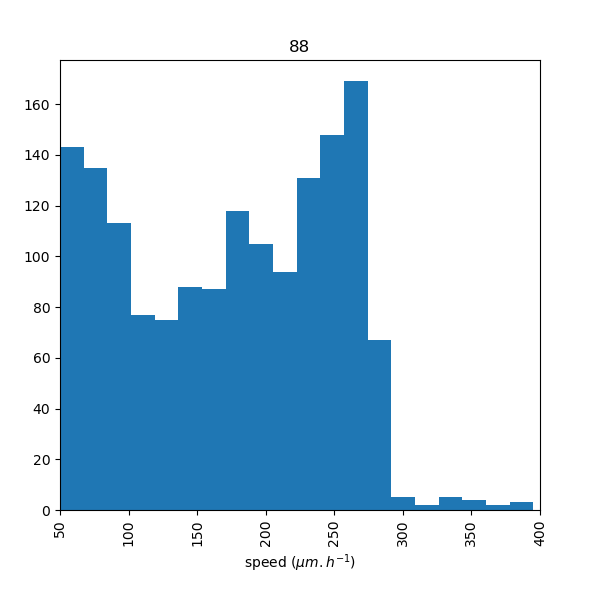

In [169]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
result.loc[(result['speed']>50) & (result['speed']<400)& (result['Plate']==88)].hist('speed','Plate', bins = 20,ax =ax)
ax.set_xlabel('speed $(\mu m.h^{-1})$')
ax.set_xlim((50,400))

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:403: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 0, 'speed')

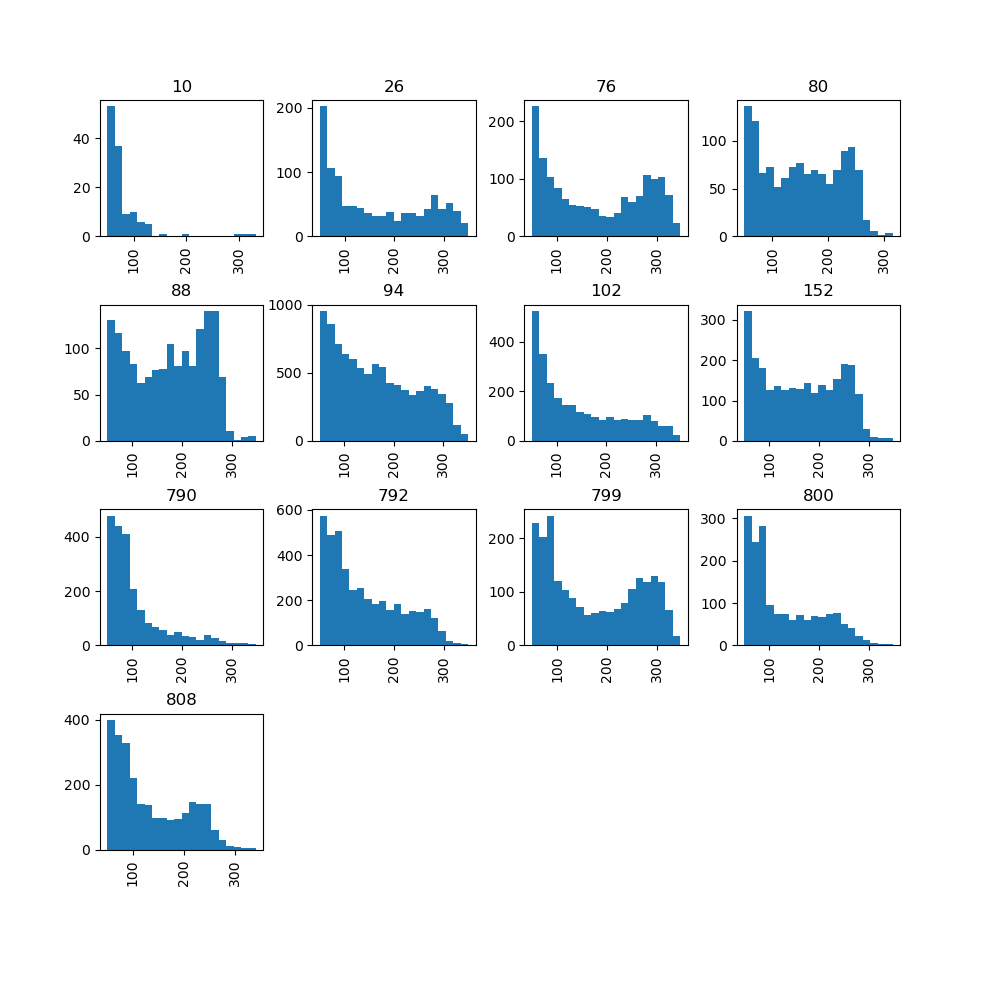

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
result.loc[(result['speed']>50) & (result['speed']<350)].hist('speed','Plate', bins = 20,ax=ax)
ax.set_xlabel('speed')

In [9]:
result.head()

,end,time,speed,time_since_emergence,Plate,t
0,0.0,2.0,182.893809,2.0,799,0
1,1.0,2.0,128.878255,2.0,799,0
4,4.0,2.0,83.043454,2.0,799,0
6,6.0,2.0,16.606078,2.0,799,0
13,13.0,2.0,4.879037,2.0,799,0


In [20]:
moving_av = real_growth_patterns.rolling(window=1000,on = x).mean()
moving_av

,end,time,speed,time_since_emergence,Plate,t
0,NaN,NaN,NaN,2.0,NaN,NaN
1,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,NaN
0,NaN,NaN,NaN,4.0,NaN,NaN
1,NaN,NaN,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...
30973,14895.141,1.997633,167.375102,2.0,88.0,79.406
30984,14916.335,1.997633,167.323203,2.0,88.0,79.446
31053,14937.306,1.997633,167.260455,2.0,88.0,79.486
31079,14957.772,1.997633,167.171902,2.0,88.0,79.526


In [ ]:
result.loc[(result['speed']>50) & (result['speed']<350)]

In [26]:
result.sort_values('time_since_emergence',inplace = True,ignore_index= True)

In [37]:
hyph = choice(list(all_hyphaes))

In [48]:
all_hyphaes = set((real_growth_patterns['indiv_hypha_label']).values)
long_tracked_hypha = [hyph for hyph in all_hyphaes if len(real_growth_patterns.loc[real_growth_patterns['indiv_hypha_label']==hyph])>=20]

In [50]:
len(long_tracked_hypha)

143

Text(0, 0.5, 'hyphal tip speed $(\\mu m.h^{-1})$')

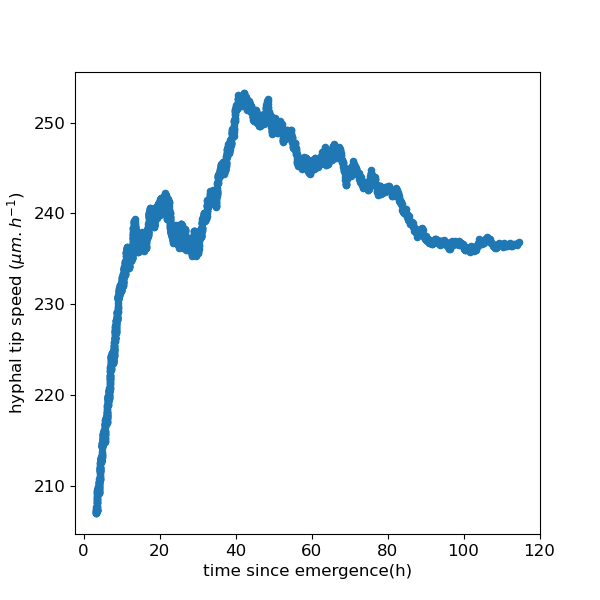

In [62]:
plt.close('all')
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 12})

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
x = 'time_since_emergence'
y = 'speed'
xlabel = 'time since emergence(h)'
ylabel = 'hyphal tip speed $(\mu m.h^{-1})$'
long_growth_patterns = real_growth_patterns.loc[real_growth_patterns['indiv_hypha_label'].isin(long_tracked_hypha)]
moving_av = long_growth_patterns.rolling(window=500).mean()
moving_av.plot(x,y,'scatter',xlabel =xlabel, ylabel = ylabel,ax =ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

In [34]:
x = 'time_since_emergence'
y = 'speed'
real_growth_patterns = result.loc[(result['speed']>50) & (result['speed']<350)]
moving_av = real_growth_patterns.rolling(window=1000).mean()
# moving_av.plot(x,y,'scatter')

In [ ]:
        whole_plate_info['time_since_begin'] = (whole_plate_info['datetime'] - min(whole_plate_info['datetime']))/ np.timedelta64(1, 'h')


<AxesSubplot:ylabel='Frequency'>

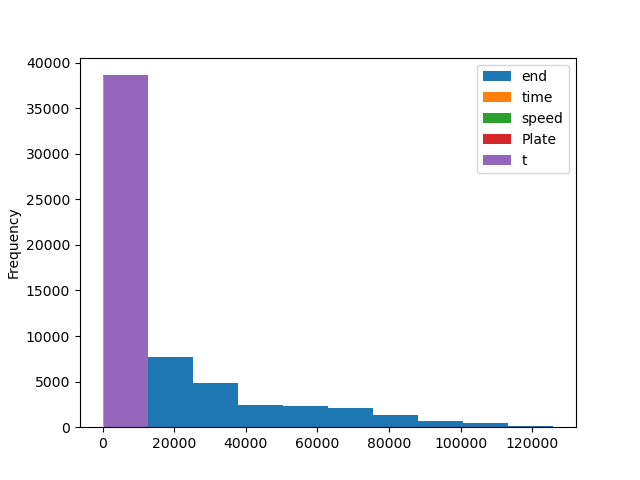

In [60]:
result.loc[result['speed']>0]['speed'].hist('Plate',bins = 100)

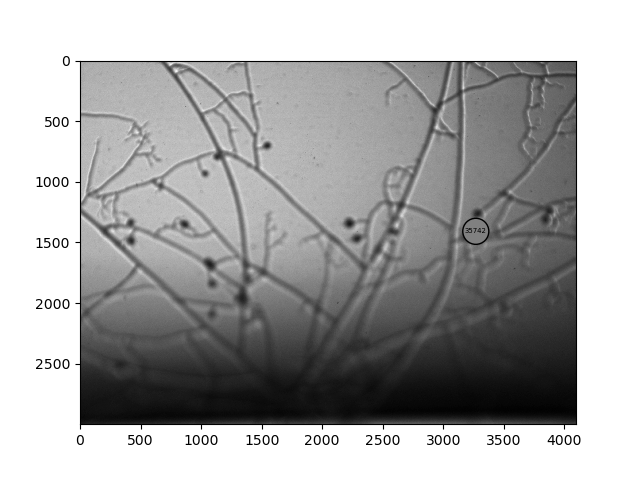

In [19]:
hypha.get_root(t).show_source_image(t,t)

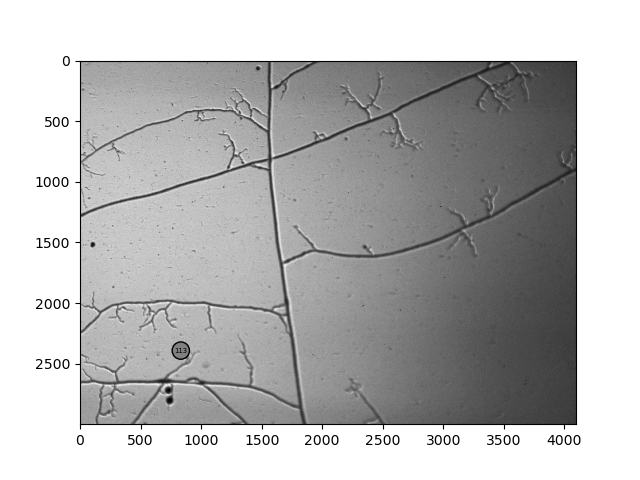

In [20]:
hypha.end.show_source_image(t,t)

In [30]:
f(hypha,t-1,tp1-1,list_args[index])

('time', 92.0)

In [28]:
dynamic_data

{}

In [22]:
from amftrack.pipeline.functions.hyphae_id_surf import get_pixel_growth_and_new_children

def get_time(hypha,t,tp1,args):
    seconds = (hypha.experiment.dates[tp1]-exp.dates[t]).total_seconds()
    return("time",seconds/3600)
def get_speed(hypha,t,tp1,args):
    try:
        pixels,nodes = get_pixel_growth_and_new_children(hypha,t,tp1)
        speed = np.sum([get_length_um(seg) for seg in pixels])/get_time(hypha,t,tp1,None)[1]
        return('speed',speed)
    except:
        print('not_connected',hypha.end.label,hypha.get_root(tp1).label)
        return('speed',None)